# Estimating effect of multiple treatments

In [1]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                    num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df=data['df']
df.head()

,X0,X1,W0,W1,W2,W3,v0,v1,y
0,1.915092,1.620087,-0.734004,1.166135,1,1,4.812868,6.143449,315.635386
1,0.002147,0.669278,-0.488148,1.662905,0,0,2.241058,-0.507441,20.008368
2,0.248668,0.744331,0.395333,0.363403,1,1,8.223679,9.169402,322.803160
3,1.391820,0.685058,2.196834,-0.031341,1,2,13.784811,16.208969,1188.634520
4,0.978381,0.656576,0.686080,0.260394,2,1,12.353938,13.503698,785.596373


In [8]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0', 'v1'] on outcome ['y']


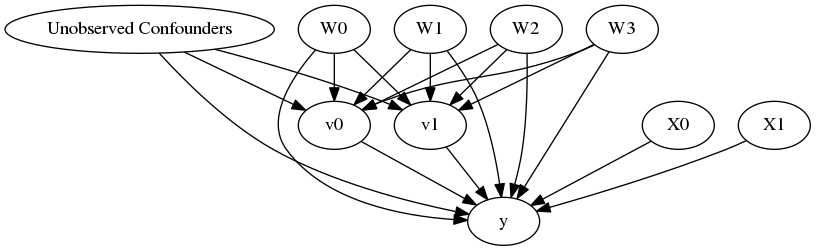

In [9]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [10]:
identified_estimand= model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W0', 'Unobserved Confounders', 'W1', 'W2', 'W3']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                
─────────(Expectation(y|W0,W1,W2,W3))
d[v₀  v₁]                            
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)
### Estimand : 2
Estimand name: iv
No such variable found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [16]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1),
                                       method_params={'need_conditional_estimates': False})
print(linear_estimate) 

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: y~v0+v1+W0+W1+W2+W3+v0*X0+v0*X1+v1*X0+v1*X1


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                
─────────(Expectation(y|W0,W1,W2,W3))
d[v₀  v₁]                            
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: y~v0+v1+W0+W1+W2+W3+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 90.33055385892129



You can estimate conditional effects, based on effect modifiers. 

In [18]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1))
print(linear_estimate) 

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: y~v0+v1+W0+W1+W2+W3+v0*X0+v0*X1+v1*X0+v1*X1


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                
─────────(Expectation(y|W0,W1,W2,W3))
d[v₀  v₁]                            
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: y~v0+v1+W0+W1+W2+W3+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 90.33055385892129
### Conditional Estimates
__categorical__X0  __categorical__X1
(-2.629, 0.14]     (-2.936, 0.0176]      -3.709237
                   (0.0176, 0.586]       25.191433
                   (0.586, 1.084]        43.708158
                   (1.084, 1.661]        61.782760
                   (1.661, 4.444]        90.521027
(0.14, 0.72]       (-2.936, 0.0176]      24.438689
                   (0.0176, 0.586]       54.299181
                 

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
